


# **Aprendizado de Máquina Não Supervisionado**

https://www.kaggle.com/datasets/blurredmachine/fifa-2019-world-cup-dataset 


## Setup

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UP/FIFA_data.csv',
                    sep=',', encoding='iso-8859-1')

In [ ]:
df.head()

,ï»¿,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,â¬228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,â¬138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,â¬196.4M


## Limpeza de dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿                       18206 non-null  int64  
 1   ID                        18206 non-null  int64  
 2   Name                      18206 non-null  object 
 3   Age                       18206 non-null  int64  
 4   Photo                     18206 non-null  object 
 5   Nationality               18206 non-null  object 
 6   Flag                      18206 non-null  object 
 7   Overall                   18206 non-null  int64  
 8   Potential                 18206 non-null  int64  
 9   Club                      17965 non-null  object 
 10  Club Logo                 18206 non-null  object 
 11  Value                     18206 non-null  object 
 12  Wage                      18206 non-null  object 
 13  Special                   18206 non-null  int64  
 14  Prefer

Removendo colunas que não seria possível transformar em variáveis categóricas por conter muitos valores distintos

In [7]:
df = df.drop(columns=['ï»¿', 'Release Clause', 'Flag', 'ID', 'Club Logo','Name', 'Photo', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'])
df.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [8]:
df.isnull().sum()

Age                          0
Overall                      0
Potential                    0
Special                      0
International Reputation    48
Weak Foot                   48
Skill Moves                 48
Jersey Number               60
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSpeed                 48
Agility                     48
Reactions                   48
Balance                     48
ShotPower                   48
Jumping                     48
Stamina                     48
Strength                    48
LongShots                   48
Aggression                  48
Interceptions               48
Positioning                 48
Vision                      48
Penaltie

Substituindo nulos por 0

In [9]:
df = df.fillna(0)

## Agrupamento Hierárquico

In [10]:
from sklearn.preprocessing import StandardScaler

Escalonando o dataset limpo

In [11]:
escala = StandardScaler()
df_esc = escala.fit_transform(df)

In [15]:
df_esc

array([[ 1.25866838,  4.01896319,  3.69801868, ..., -0.07209197,
        -0.13772922, -0.48280668],
       [ 1.68698405,  4.01896319,  3.69801868, ..., -0.07209197,
        -0.13772922, -0.31569259],
       [ 0.18787921,  3.7294145 ,  3.53505587, ..., -0.07209197,
        -0.07901936, -0.31569259],
       ...,
       [-1.31122562, -2.78543105, -1.35382833, ..., -0.43568393,
        -0.66611798, -0.25998789],
       [-1.95369913, -2.78543105, -0.7019771 , ..., -0.37508527,
        -0.60740812, -0.20428319],
       [-1.73954129, -2.78543105, -0.86493991, ..., -0.13269063,
        -0.48998839, -0.42710198]])

In [ ]:
df_esc.shape

(18206, 42)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components = 2)

In [18]:
df_pca = pca.fit_transform(df_esc)

In [19]:
df_pca

array([[-10.15672979,  -5.04391727],
       [-10.2337216 ,  -3.62457229],
       [ -9.71204685,  -5.12250711],
       ...,
       [  5.09658015,  -1.00175117],
       [  3.56486526,  -2.79306358],
       [  3.4572074 ,  -2.7159241 ]])

### Agrupamento em Clusters - Dendrograma

In [20]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

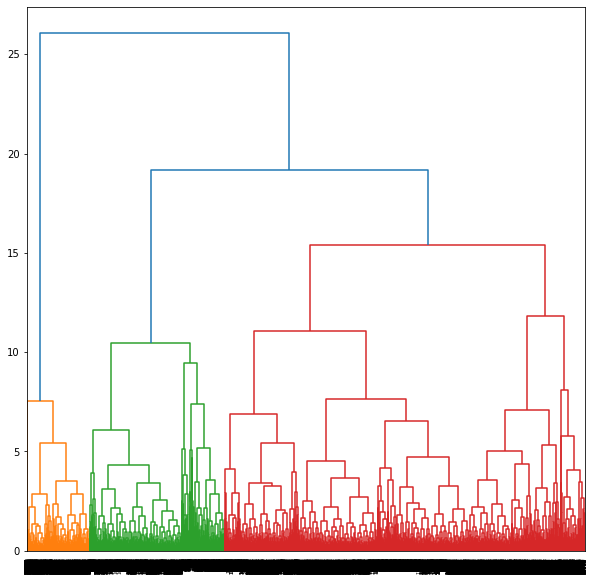

In [ ]:
plt.figure(figsize=(10, 10))
dendrograma = dendrogram(linkage(df_pca, method = 'complete'))

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'complete')
classificacao = hier.fit_predict(df_pca)

In [28]:
classificacao

array([2, 2, 2, ..., 0, 0, 0])

### Agrupamento em Clusters - Aglomeração

In [29]:
import plotly.express as px
import plotly.graph_objects as go

In [30]:
graf = px.scatter(x = df_pca[:,0], y = df_pca[:,1], color=classificacao)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

In [31]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    df_pca,
    labels=labels,
    dimensions=range(2),
    color=df["Special"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

In [33]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [34]:
kmeans_fit = kmeans.fit(df_pca)

In [35]:
centroides = kmeans_fit.cluster_centers_
centroides

array([[-4.00544765, -0.02029854],
       [ 0.5417526 ,  2.38101091],
       [-0.86405559, -2.20980129],
       [10.93318844, -1.07010772]])

In [36]:
graf1 = px.scatter(x = df_pca[:,0], y = df_pca[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,1], y = centroides[:,1], size = [5, 5, 5, 5])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [ ]:
agrupamentos = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamentos

,Grupo
0,2
1,2
2,2
3,0
4,2
...,...
18201,0
18202,0
18203,0
18204,0


In [ ]:
df_hc = pd.concat([df, agrupamentos],axis=1)
df_hc

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Grupo
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18201,18,47,68,1098,1.0,3.0,2.0,29.0,22.0,23.0,...,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,0
18202,19,47,65,1307,1.0,2.0,2.0,22.0,34.0,38.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,0
18203,19,47,63,1098,1.0,2.0,2.0,21.0,23.0,52.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,0
18204,16,47,67,1189,1.0,3.0,2.0,33.0,25.0,40.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,0


In [ ]:
df_hc.loc[df.Age == 42]

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Grupo
10545,42,65,65,1296,2.0,3.0,1.0,1.0,23.0,11.0,...,45.0,27.0,24.0,22.0,64.0,63.0,62.0,67.0,63.0,1


In [ ]:
grupoX = df_hc.loc[df_hc.Grupo == 2]
grupoX 

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Grupo
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2
5,27,91,91,2142,4.0,4.0,4.0,10.0,81.0,84.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15317,19,59,69,1656,1.0,5.0,2.0,24.0,60.0,59.0,...,63.0,51.0,60.0,52.0,13.0,8.0,13.0,11.0,13.0,2
15684,17,59,80,1660,1.0,3.0,3.0,30.0,50.0,58.0,...,61.0,47.0,60.0,57.0,12.0,11.0,6.0,14.0,12.0,2
15866,21,58,67,1639,1.0,3.0,3.0,2.0,63.0,52.0,...,53.0,50.0,48.0,51.0,11.0,9.0,14.0,6.0,12.0,2
15943,20,58,71,1644,1.0,3.0,3.0,93.0,62.0,50.0,...,52.0,57.0,58.0,53.0,14.0,7.0,9.0,6.0,7.0,2


## Elbow Method

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

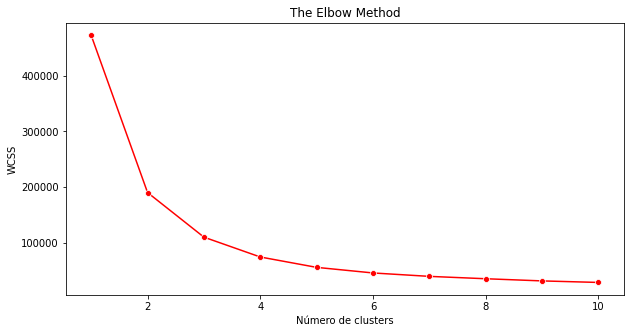

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');